# Coupled memristors Evolution and Form Factor

We calculate the evolution of two coupled quantum memristors as given by:  

**Phys. Rev. A 104, 062605 (2021)**

and calculate the form factor of the resulting hysteresis curve.

The idea is to compare the best and worst configuration according to the trained model. Furthermore we calculate the entanglement between the memristors (calculated by the concurrence) and compare with the value of the form factor in time.

## Theory

A system of two quantum memristors coupled by a capacitor and an inductor is described by:
$$
\hat{H} = \sum_{\ell = 1}^{2} E_{C_{\ell, \ell}}\hat{n}_{\ell}^{2} + \frac{E_{L_{\ell, \ell}}}{2}\hat{\varphi}_{\ell}^{2} + E_{C_{1,2}} \hat{n}_{1} \hat{n}_{2} + E_{L_{1,2}} \hat{\varphi}_{1} \hat{\varphi}_{2}
$$
where:
- $\hat{n}_{\ell}$ is the number of cooper pairs operator for memristor $\ell$.
- $ \hat{\varphi}_{\ell}$ is the phase operator for memristor $\ell$. 
- $E_{C} = 2e^{2} \hat{C}^{-1}$ is the charge energy matrix.
- $\hat{C}^{-1}$ is the inverse of the capacitance matrix. 
- $E_{L} = \varphi_{0}^{2} \hat{L}^{-1}$ is the inductive energy matrix.
- $\varphi_{d} = \phi_{d}/\varphi_{0}$ is the time-dependent external phase. 
- $\varphi_{0} = \hbar/2e$ is the reduced flux quantum.

In the Fock basis, this is

$$
H = \hbar \sum_{\ell = 1}^{2} \omega_{\ell} a_{\ell}^{\dagger}a_{\ell} - \sqrt{\omega_{1} \omega_{2}} (\alpha - \beta)(a_{1}^{\dagger} a_{2} + a_{2}^{\dagger} a_{1})
$$
Here,
- $\omega_{\ell} = \sqrt{2 E_{C_{\ell, \ell}} E_{L_{\ell, \ell}}}/\hbar$  is the frequency of memristor $\ell$.

- $\alpha = \frac{E_{L_{1, 2}}}{ \sqrt{E_{L_1} E_{L_2}} }$.

- $\beta = \frac{E_{C_{1, 2}}}{ \sqrt{E_{C_1} E_{C_2}} }$.

Additionally we have
$$
\hat{n}_{\ell} = \frac{i}{4g_{\ell}}(\hat{a}_{\ell}^{\dagger} - \hat{a}_{\ell}) \\
\hat{\varphi}_{\ell} = 2g_{\ell}(\hat{a}_{\ell}^{\dagger} + \hat{a}_{\ell})
$$

with $g_{\ell} = \big(E_{C_{\ell, \ell}}/ 32 E_{L_{\ell, \ell}}  \big)^{1/4}$.


The system undergoes quasiparticle decay, described by the master equation
$$
\dot{\rho}(t) = -\frac{i}{\hbar}\big[\hat{H}, \rho \big] + \sum_{\ell} \frac{\Gamma_{\ell}(t)}{2} \bigg(\hat{a}_{\ell}\rho \hat{a}_{\ell}^{\dagger} - \frac{1}{2}\{\hat{a}_{\ell}^{\dagger}\hat{a}_{\ell}, \rho \} \bigg)
$$
where 
- $\Gamma_{\ell}(t) = g_{\ell}^{2}e^{-g_{\ell}^{2}} \bigg(\frac{1 + \cos\big(\phi_{d_{\ell}}(t)/2\big)}{2} \bigg)S_{\textrm{qp}}(\omega_{\ell})$, is the time dependent decay rate for each subsystem.
- $\phi_{d_{\ell}}(t) = \phi_{0, \ell} + A \sin(\omega_{\ell} t)$, is the external flux in the SQUID.
- $S_{\textrm{qp}}(\omega_{\ell}) = \omega_{\ell}$ is the spectral density. 

The quasiparticle current $\hat{I}_{\textrm{qp}}$ and the voltage across the capacitor $\hat{V}_{\textrm{cap}}$ are the quantities that show memristive dynamics, they can be obtained from the equations of motion of $\hat{n}$ and $\hat{\varphi}$. The memristive relation is given by

$$
\begin{aligned}
\hat{I}_{\textrm{qp}, \ell} &= G_{\ell}(t) \hat{V}_{\textrm{cap}, \ell} \\
\hat{V}_{\textrm{cap}, \ell} &= -2e\langle \hat{n}\rangle/C_{\Sigma, \ell}
\end{aligned}
$$

with $G_{\ell}(t) = \frac{g_{\ell}^{2}e^{-g_{\ell}^{2}}C_{\Sigma, \ell} S_{\textrm{qp}, \ell}(\omega_{\ell})}{4} \bigg(1 + \cos\big(\frac{\phi_{d_{\ell}}(t)}{2}\big) \bigg)$.


Finally, the coupled system must satisfy the two-level approximation for each quantum memristor, we can ensure this by limiting the total excitation number to 1, and consider only product states

$$
\vert \psi (t) \rangle = \vert \psi_{1} (t) \rangle \vert \psi_{2} (t) \rangle
$$

and $\vert \psi_{n} (t) \rangle = \cos(\theta_{n} / 2) \vert 0 \rangle + e^{i \eta_{n}} \sin(\theta_{n}/2) \vert 1 \rangle$. with:

$$
\theta_{1} = 2\arcsin (\cos(\theta_{2}/2))
$$

We calculate the form factor for the hysteresis curves that are drawn in the $\hat{I}_{\textrm{qp}}$-$\hat{V}_{\textrm{cap}}$ plot. The form factor involves calculating the area and perimeter of a closed figure, so it can only be calculated at certain times where hysteresis curve closes on itself. The form factor is given by 
$$
F = 4\pi\frac{A}{P^{2}}
$$

### Import

In [17]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import qutip as qp
import time


Choose the best and worst configuration from the model

In [18]:
Data_best = pd.read_csv('best_ff_75percentile.csv')
Data_worst = pd.read_csv('worst_ff_25percentile.csv')

In [19]:
idx_best = Data_best['Formfactor_1'].idxmax()
parameters_best = [[np.pi/2, Data_best['theta'].iloc[idx_best]],  # theta_1
                   [np.pi/2, Data_best['theta'].iloc[idx_best]],  # theta_2
                   Data_best['lambda_'].iloc[idx_best],  # lambda
                   Data_best['C12'].iloc[idx_best],  # C12
                   Data_best['L12'].iloc[idx_best]]  # L12


In [20]:
idx_worst = Data_worst['Formfactor_1'].idxmin()
parameters_worst = [[np.pi/2, Data_best['theta'].iloc[idx_worst]],  # theta_1
                   [np.pi/2, Data_best['theta'].iloc[idx_worst]],  # theta_2
                   Data_best['lambda_'].iloc[idx_worst],  # lambda
                   Data_best['C12'].iloc[idx_worst],  # C12
                   Data_best['L12'].iloc[idx_worst]]  # L12


# Coupled Memristors Evolution Function

For the evolution of the coupled quantum memristors, we calculate the memristive variables $V_1$, $V_2$, $I_1$, $I_2$, as well as the form factor of each memristor $FF_1$, $FF_2$, and the state of the total system $\rho(t)$. The latter is used to calculate the quantum correlations between the memristors.

In order to observe more of the evolution, we will set the total time to 30 periods of the memristor (previously it was up to 5 periods). The period is given by $T = 2\pi/\omega_{\ell}$, which depends on the parameters chosen.

First, define the function that calculates the evolution of the two quantum memristors, it takes 5 inputs: 
- theta_1: 2D vector for the angles of the Bloch sphere for memristor 1
- theta_2: 2D vector for the angles of the Bloch sphere for memristor 1
- lambda_: Parameter that sets the intensity of the decay of the system.
- C12: Capacitive coupling between the memristors
- L12: Inductive coupling between the memristors



In [45]:
# =============================================================================
# System Parameters
# =============================================================================
""" Fundamental constants"""
hbar = 1.054571 * 1e-34  # Planck constant [J x s]
phi0 = 2.067833 * 1e-15/(2*np.pi)  # Magnetic Flux quantum [Wb]
G0 = 7.748091 * 1e-5  # Conductance quantum [Siemens]
e = 1.602176 * 1e-19 # electron charge [C]


def Coupled_memristor_evolution(theta_1 = 1, theta_2 = 1, lambda_ = 1, C12 = 0, L12 = 0):
    # Based on the reference, the Capacitive energy is 1Ghz, and the
    # Inductive energy is 1000 times the capacitive energy. 
    # We choose the parameters corresponding to this condition
    C1 = 4.868269*1e-13  # Effective SQUID capacitance [Farad] => Cg = 2*(e**2)/(1e9*hbar)
    C2 = 4.868269*1e-13  # Effective SQUID capacitance [Farad] => Cg = 2*(e**2)/(1e9*hbar)
    L1 = 1.027059*1e-9  # Inductance of outer loop [Henry]
    L2 = 1.027059*1e-9  # Inductance of outer loop [Henry]
    
    "Here we use C12, L12 arguments"
    if C12 is not 0:
        # Capacitance matrix
        C = np.array([ [C1 + C12, -C12], 
                       [-C12, C2 + C12] ])
        EC12 = 2*(e**2)*C12       # charging energy of capacitive coupling
    else:
        C = np.array([ [C1 , 0], 
                       [0, C2] ])
        EC12 = 0
    # Inverse of capacitance matrix
    C_inv = np.linalg.inv(C)

    if L12 is not 0:
        # inductance matrix
        L = np.array([ [1/L1 + 1/L12, -1/L12], 
                       [-1/L12, 1/L2 + 1/L12] ])
        EL12 = (phi0**2)/L12      # Inductive energy of inductive coupling
    else:
        L = np.array([ [1/L1, 0], 
                       [0, 1/L2] ])
        EL12 = 0


    EC1 = 2*(e**2)*C_inv[0,0]  # Charging energy of capacitor of memristor 1
    EC2 = 2*(e**2)*C_inv[1,1]   # Charging energy of capacitor of memristor 2

    EL1 = (phi0**2) * L[0,0]    # Inductive energy of inductor of memristor 1
    EL2 = (phi0**2) * L[1,1]    # Inductive energy of inductor of memristor 2
    

    g1 = (EC1/(32*EL1))**(1/4) # Constant relevant for n and phi operators
    g2 = (EC2/(32*EL2))**(1/4) # Constant relevant for n and phi operators
    omega1 = np.sqrt(2*EC1*EL1)/(1e9*hbar) # Frequency of the harmonic oscillator of memristor 1, in units of GHz
    omega2 = np.sqrt(2*EC2*EL2)/(1e9*hbar) # Frequency of the harmonic oscillator of memristor 2, in units of GHz
    
    "Here we use s_cte argument"
    s_w1 = lambda_ * omega1  # Spectral density  of environment
    s_w2 = lambda_ * omega2  # Spectral density  of environment

    alpha = EL12/np.sqrt(EL1*EL2)
    beta = EC12/np.sqrt(EC1*EC2)
    dim = 2  # Number of excitations in the harmonic oscillator

    phi0_1 = np.pi/2
    phi0_2 = np.pi/2
    A_1 = 1
    A_2 = 1

    k = np.sqrt(omega1*omega2)*(alpha + beta)
    
    # Testing
    print(f'Test: EL12={EL12:.2f}, alpha={alpha:.3f}, beta={beta}')
    
    
    # =============================================================================
    # Operators and decay
    # =============================================================================
    """ Define the operators and Hamiltonian of the system """
    I = qp.qeye(dim)     # Identity
    a1 = qp.tensor(qp.destroy(dim), I)  # Annihilation operator for memristor 1
    a2 = qp.tensor(I, qp.destroy(dim))  # Annihilation operator for memristor 2
    H = omega1*a1.dag()*a1 + omega2*a2.dag()*a2 + k*(a1.dag()*a2 + a1*a2.dag())  # Coupled memristors Hamiltonian
 
    n1 = (1j/(4*g1))*(a1.dag() - a1) # Number of Cooper pairs operator for memristor 1
    n2 = (1j/(4*g2))*(a2.dag() - a2) # Number of Cooper pairs operator for memristor 2
    phi1 = 2*g1*(a1.dag() + a1)   # Phase operator for memristor 1
    phi2 = 2*g2*(a2.dag() + a2)   # Phase operator for memristor 2

    "Initial State"
    "Here we use theta_1, theta_2 arguments"
    psi_1 = np.cos(theta_1[0]/2)*qp.fock(dim,0) + np.exp(1j*theta_1[1])*np.sin(theta_1[0]/2) * qp.fock(dim, 1) 
    psi_2 = np.cos(theta_2[0]/2)*qp.fock(dim,0) + np.exp(1j*theta_2[1])*np.sin(theta_2[0]/2) * qp.fock(dim, 1) 
    
    psi_0 = qp.tensor(psi_1, psi_2)

    """ Define the time dependent decay rate """
    params = {'g1':g1, 'g2':g2, 'omega1':omega1, 'omega2':omega2, 's_w1':s_w1, 's_w2':s_w2}

    def gamma1(t,args):
        g1 = args['g1']     # import g1 into function namespace
        s_w1 = args['s_w1'] # import s_w1 into function namespace   
        phi_ini = np.pi/2  # phase shift of external flux
        phid = phi_ini + np.sin(omega1*t)  # external flux
        gamma_0 = 0.25*g1**2 * np.exp(-g1**2) * s_w1   # bare decay rate
        gamma_T = np.sqrt(gamma_0 * (1 + np.cos(phid)))  # We take square root because master equation solver squares the decay rate

        return gamma_T
              
    def gamma2(t,args):
        g2 = args['g2']     # import g1 into function namespace
        s_w2 = args['s_w2'] # import s_w1 into function namespace   
        phi_ini = np.pi/2  # phase shift of external flux
        phid = phi_ini + np.sin(omega2*t)  # external flux
        gamma_0 = 0.25*g2**2 * np.exp(-g2**2) * s_w2   # bare decay rate
        gamma_T = np.sqrt(gamma_0 * (1 + np.cos(phid)))  # We take square root because master equation solver squares the decay rate

        return gamma_T
              
    "Collapse operators"
    c_ops = [ [a1, gamma1], [a2, gamma2] ]  # time-dependent collapse operators

    # =============================================================================
    # System Dynamics
    # =============================================================================
    """ Dynamics parameters """
    number_oscillations = 30
    points_per_oscillation = 500
    time_points = number_oscillations * points_per_oscillation
    "Timescale should be chosen carefully"          
    timescale = 2*np.pi/(omega1)  # Period of the oscillator
    t = timescale * np.linspace(0, number_oscillations, time_points) # Time vector for our time evolution

    rho_t = qp.mesolve(H, psi_0, t, c_ops, args=params)  # Solve master equation

    V1 = np.zeros(len(t))  # Voltage vector for mem 1
    V2 = np.zeros(len(t))  # Voltage vector for mem 2
    P1 = np.zeros(len(t))  # Phase vector for mem 1
    P2 = np.zeros(len(t))  # Phase vector for mem 2
    Iqp1 = np.zeros(len(t))  # Quasiparticle current vector for mem 1
    Iqp2 = np.zeros(len(t))  # Quasiparticle current vector for mem 2

    for index, state in enumerate(rho_t.states):
        V1[index] = -2*e*qp.expect(n1, state)/C1    # Voltage for mem 1
        V2[index] = -2*e*qp.expect(n2, state)/C2    # Voltage for mem 2
        P1[index] = qp.expect(phi1, state)   # Phase for mem 1
        P2[index] = qp.expect(phi2, state)   # Phase for mem 2  
        Iqp1[index] = (gamma1(t[index], params)**2) * (V1[index]*C1)   # Quasiparticle Current for mem 1
        Iqp2[index] = (gamma2(t[index], params)**2) * (V2[index]*C2)   # Quasiparticle Current for mem 2
        
    """ Define maximum initial voltage and quasiparticle current """
    psi1_max_volt = np.cos(np.pi/4)*qp.fock(dim, 0) + np.exp(1j*np.pi/2)*np.sin(np.pi/4) * qp.fock(dim, 1)               
    psi2_max_volt = np.cos(np.pi/4)*qp.fock(dim, 0) + np.exp(1j*np.pi/2)*np.sin(np.pi/4) * qp.fock(dim, 1) 
    psi_max = qp.tensor(psi1_max_volt, psi2_max_volt)
    
    V1_0 = -2*e*qp.expect(n1, psi_max)/C1  # Normalizing voltage constant for mem 1
    V2_0 = -2*e*qp.expect(n2, psi_max)/C2  # Normalizing voltage constant for mem 2          
    I1_0 = V1_0*(gamma1(0, params)**2)*C1     # Normalizing quasiparticle current constant for mem 1
    I2_0 = V2_0*(gamma2(0, params)**2)*C2     # Normalizing quasiparticle current constant for mem 2
    
    # =============================================================================
    # Auxiliary functions
    # =============================================================================

    def Identify_loops(x,y):
        """
        This function stores the indices of the point in time
        when x crosses zero value, and stores them in the indices
        container.

        One memristive hysteresis curve crosses the origin two times during its entire loop
        So the indices that denote the starting point of each hysteresis curve are obtained
        by taking every other element from indices container.
        This is stored in the real_indices container.
        """
        indices = []
        real_indices = []
        for ind in range(len(x)-1):
            prod_sign = np.sign(x[ind]*x[ind+1])
            if prod_sign == -1:
                closest_ind = np.argmin(np.abs([x[ind], x[ind+1]])) # Choose which point is closer to zero n or n+1
                if closest_ind == 0:
                    indices.append(ind)
                else:
                    indices.append(ind+1)

        for n in range(int(len(indices)/2) ):
            real_indices.append(indices[2*n])  
        return real_indices  # 

    def Area(x,y):
        "Area is calculated with Green's theorem"
        A = 0
        for i in range(len(x)-1):
            A += 0.5*abs(y[i]*(x[i+1]-x[i]) - x[i]*(y[i+1]-y[i]))
        return A

    def Perimeter(x,y):
        L = 0
        for i in range(len(x)-1):
            L += np.sqrt((x[i+1] - x[i])**2 + (y[i+1] - y[i])**2)
        return L

    # =============================================================================
    # Form Factor
    # =============================================================================
    def Form_factor(x,y):
        indices = Identify_loops(x,y)
        number_of_loops = len(indices)-1
        form_factor = np.zeros([number_of_loops])

        for n in range(number_of_loops):
            loop_x = x[indices[n]:indices[n+1]]
            loop_y = y[indices[n]:indices[n+1]]
            form_factor[n] = 4*np.pi*Area(loop_x,loop_y)/(Perimeter(loop_x,loop_y)**2)

        return form_factor


    # =============================================================================
    # Calculate Form Factor for current Dynamics
    # =============================================================================

    FF1 = Form_factor(V1/V1_0, Iqp1/I1_0) # Form factor for normalized current and voltage
    FF2 = Form_factor(V2/V2_0, Iqp2/I2_0) # Form factor for normalized current and voltage
    ff1 = np.mean(FF1)
    ff2 = np.mean(FF2)
    
    FF = [FF1, FF2]
    V = [V1, V2]
    Iqp = [Iqp1, Iqp2]
    
    indices = Identify_loops(V1/V1_0,Iqp1/I1_0)  # indices of points in time when a full loop is completed
    
    parameters = {'omega1':omega1, 'omega2':omega2, 'V1_0':V1_0, 'I1_0':I1_0, 
                  'V2_0':V2_0, 'I2_0':I2_0, 'timescale':timescale} 
    
    Results = [FF, V, Iqp]
    Parameters = [t, indices, parameters]
              
    return rho_t, Results, Parameters

Calculate the evolution for best and worst case

In [29]:
Rho_best, Results_best, Params_best = Coupled_memristor_evolution(*parameters_best) 
Rho_worst, Results_worst, Params_worst = Coupled_memristor_evolution(*parameters_worst) 


Test: EL12=0.00, alpha=0.218, beta=1.445787898297306e-24


In [31]:
# Best
FF_best, V_aux_best, Iqp_aux_best = Results_best
t_best, indices_best, params_best = Params_best

# Best
omega1_best = params_best['omega1']
omega2_best = params_best['omega2']
I1_0_best = params_best['I1_0']
I2_0_best = params_best['I2_0']
V1_0_best = params_best['V1_0']
V2_0_best = params_best['V2_0']
timescale_best = params_best['timescale']



# Worst
FF_worst, V_aux_worst, Iqp_aux_worst = Results_worst
t_worst, indices_worst, params_worst = Params_worst

# Worst
omega1_worst = params_worst['omega1']
omega2_worst = params_worst['omega2']
I1_0_worst = params_worst['I1_0']
I2_0_worst = params_worst['I2_0']
V1_0_worst = params_worst['V1_0']
V2_0_worst = params_worst['V2_0']
timescale_worst = params_worst['timescale']

## Plots: Best case

In [32]:
plt.rcParams["figure.figsize"] = (12, 7)

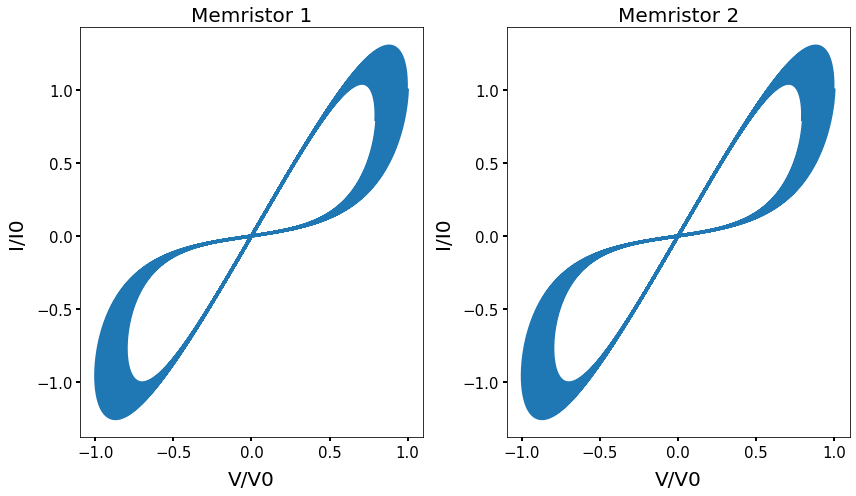

In [33]:
fig1 = plt.figure(1)

ax11 = fig1.add_subplot(1,2,1)
ax12 = fig1.add_subplot(1,2,2)

ax11.plot(V_aux_best[0]/V1_0_best, Iqp_aux_best[0]/I1_0_best,
         lw = 3)
ax11.set_title('Memristor 1', fontsize = 20)
ax11.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
ax11.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
ax11.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)

ax12.plot(V_aux_best[1]/V2_0_best, Iqp_aux_best[1]/I2_0_best,
         lw = 3)
ax12.set_title('Memristor 2', fontsize = 20)
ax12.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
ax12.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
ax12.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)
plt.tight_layout()

Since the initial state is the same for both memristors and they are identical, their evolution is also identical.

Plot the form factor in time

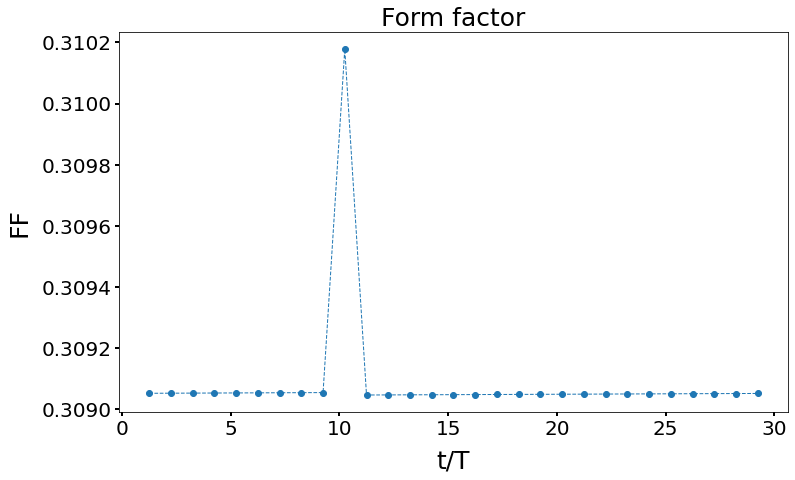

In [34]:
#Plot Form factor for best case
fig1_1 = plt.figure(1)

ax11 = fig1_1.add_subplot(1,1,1)

ax11.plot(t_best[indices_best[1:]]/timescale_best, FF_best[0], lw=1, ls='--', marker='o')
ax11.set_title('Form factor', fontsize = 25)
ax11.set_xlabel(r't/T', fontsize = 25, labelpad = 10)
ax11.set_ylabel(r'FF', fontsize = 25, labelpad = 10)
ax11.tick_params(axis='both', which='major', labelsize=20, width = 2, length=4)



## Plots: Worst Case

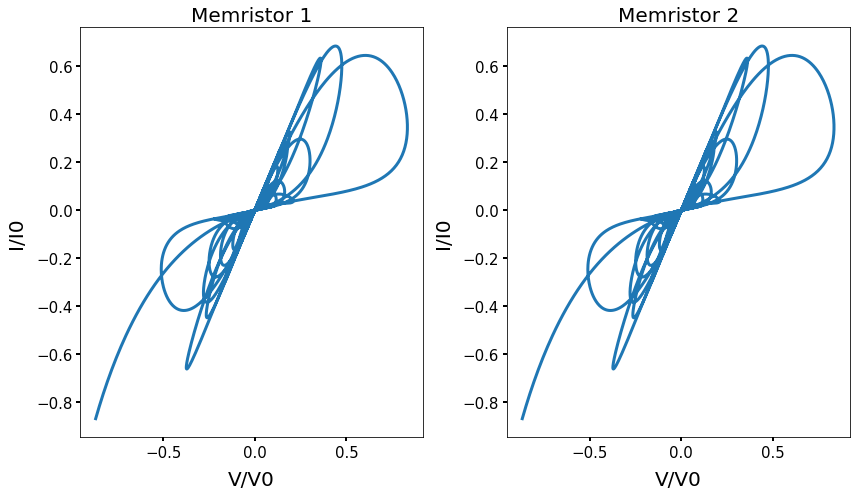

In [35]:
fig2 = plt.figure(2)

ax11 = fig2.add_subplot(1,2,1)
ax12 = fig2.add_subplot(1,2,2)

ax11.plot(V_aux_worst[0]/V1_0_worst, Iqp_aux_worst[0]/I1_0_worst,
         lw = 3)
ax11.set_title('Memristor 1', fontsize = 20)
ax11.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
ax11.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
ax11.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)


ax12.plot(V_aux_worst[1]/V2_0_worst, Iqp_aux_worst[1]/I2_0_worst,
         lw = 3)
ax12.set_title('Memristor 2', fontsize = 20)
ax12.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
ax12.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
ax12.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)
plt.tight_layout()

Form factor for worst case

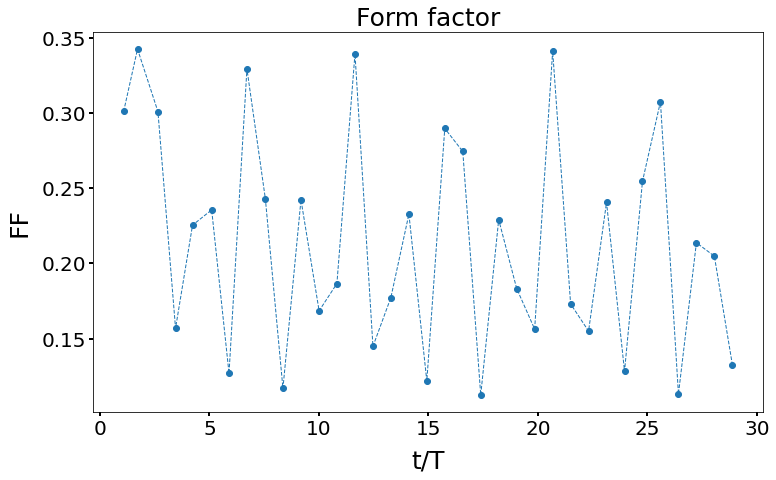

In [36]:
# Form factor for worst case

fig1_1 = plt.figure(1)

ax1 = fig1_1.add_subplot(1,1,1)

ax1.plot(t_worst[indices_worst[1:]]/timescale_worst, FF_worst[0], lw=1, ls='--', marker='o')
ax1.set_title('Form factor', fontsize = 25)
ax1.set_xlabel(r't/T', fontsize = 25, labelpad = 10)
ax1.set_ylabel(r'FF', fontsize = 25, labelpad = 10)
ax1.tick_params(axis='both', which='major', labelsize=20, width = 2, length=4)



Comparing best and worst. We only need to look at one memristor for each case

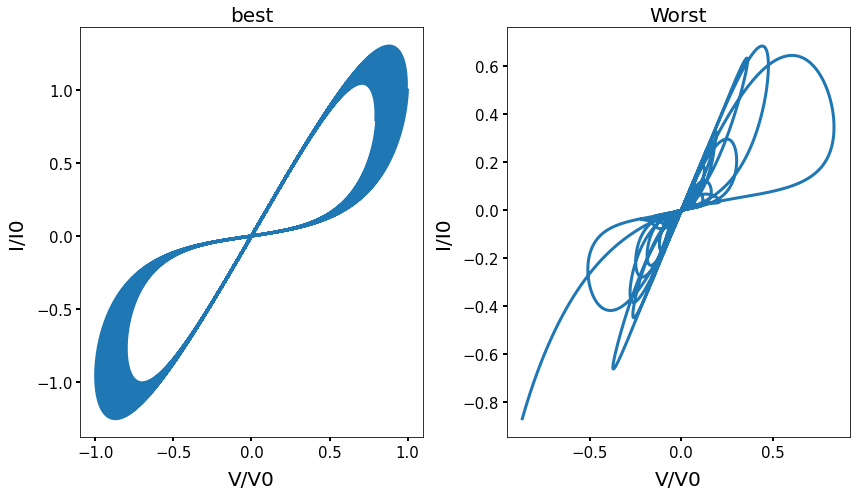

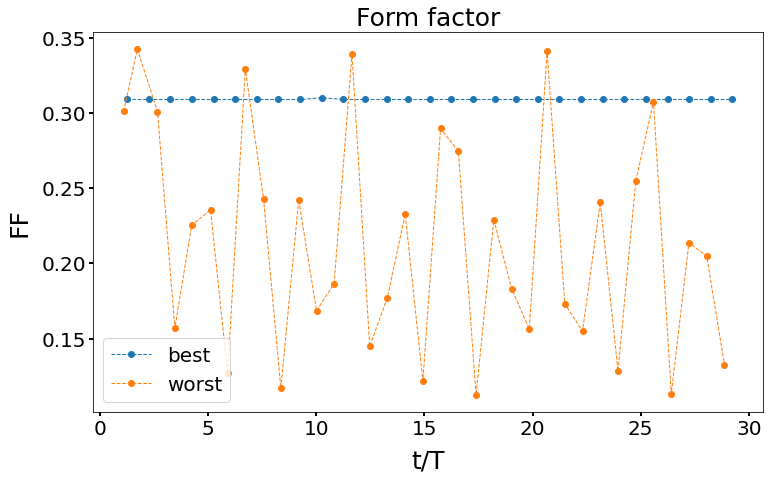

In [37]:
# best and worst comparison

# Compare hysteresis curves
fig3 = plt.figure(3)

ax31 = fig3.add_subplot(1,2,1)
ax32 = fig3.add_subplot(1,2,2)

ax31.plot(V_aux_best[0]/V1_0_best, Iqp_aux_best[0]/I1_0_best,
         lw = 3, label='best')
ax31.set_title('best', fontsize = 20)
ax31.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
ax31.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
ax31.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)


ax32.plot(V_aux_worst[1]/V2_0_worst, Iqp_aux_worst[1]/I2_0_worst,
        lw = 3, label='worst')
ax32.set_title('Worst', fontsize = 20)
ax32.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
ax32.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
ax32.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)
plt.tight_layout()


# Compare form factor
fig4 = plt.figure(4)

ax41 = fig4.add_subplot(1,1,1)
# ax31 = fig3.add_subplot(1,2,1)
# ax32 = fig3.add_subplot(1,2,2)

ax41.plot(t_best[indices_best[1:]]/timescale_best, FF_best[0], lw=1, ls='--', marker='o', label='best')
ax41.plot(t_worst[indices_worst[1:]]/timescale_worst, FF_worst[0], lw=1, ls='--', marker='o', label='worst')
ax41.set_title('Form factor', fontsize = 25)
ax41.set_xlabel(r't/T', fontsize = 25, labelpad = 10)
ax41.set_ylabel(r'FF', fontsize = 25, labelpad = 10)
ax41.tick_params(axis='both', which='major', labelsize=20, width = 2, length=4)
plt.legend(fontsize=20)

# ax32.plot(V_aux_worst[1]/V2_0_worst, Iqp_aux_worst[1]/I2_0_worst,
#         lw = 3, label='worst')
# ax32.set_title('Worst', fontsize = 20)
# ax32.set_xlabel(r'V/V0', fontsize = 20, labelpad = 10)
# ax32.set_ylabel(r'I/I0', fontsize = 20, labelpad = 10)
# ax32.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)

# Analysis of quantum correlations

We measure quantum entanglement by means of **concurrence**, a function that takes a quantum state and outputs a number which ranges from 0 (for states with no entanglement), to 1 (for states with maximal entanglement). 

The concurrence, $C$, is defined as:

$$
C(\rho) = \max(0, \lambda_{1} - \lambda_{2} - \lambda_{3} - \lambda_{4}) 
$$

in which $\lambda_{i}$ are the eigenvalues in decreasing order of the matrix

$$
R = \sqrt{\sqrt{\rho}\bar{\rho}\sqrt{\rho}}
$$

with 

$$
\bar{\rho} = (\sigma_{y}\otimes\sigma_y)\rho^{*}(\sigma_{y}\otimes\sigma_y)
$$

The concurrence is implemented in qutip, so we only need to provide the quantum state of the evolution, to obtain the concurrence at each point in time.

In [38]:
FF_1_best = FF_best[0]
FF_2_best = FF_best[1]

FF_1_worst = FF_worst[0]
FF_2_worst = FF_worst[1]


concurrence_best = np.zeros(len(Rho_best.states))
concurrence_worst = np.zeros(len(Rho_worst.states))

for t1, state in enumerate(Rho_best.states):
    concurrence_best[t1] = qp.concurrence(state)
    
for t1, state in enumerate(Rho_worst.states):
    concurrence_worst[t1] = qp.concurrence(state)

## Plot: Comparison of concurrence in best and worst case

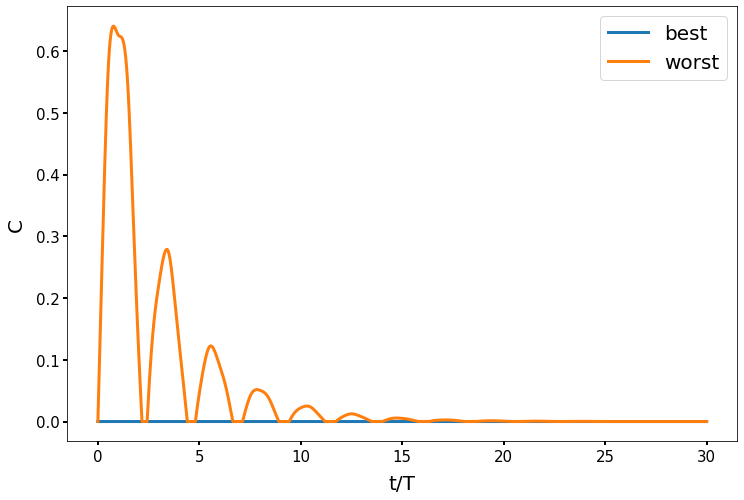

In [39]:
fig3 = plt.figure(3, figsize = [12, 8])
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(t_best/timescale_best, concurrence_best, lw = 3, label='best')
ax3.plot(t_worst/timescale_worst, concurrence_worst, lw = 3, label='worst')
ax3.set_xlabel(r't/T', fontsize = 20, labelpad = 10)
ax3.set_ylabel(r'C', fontsize = 20, labelpad = 10)
ax3.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)
ax3.legend(fontsize=20)

## Form Factor and quantum correlations

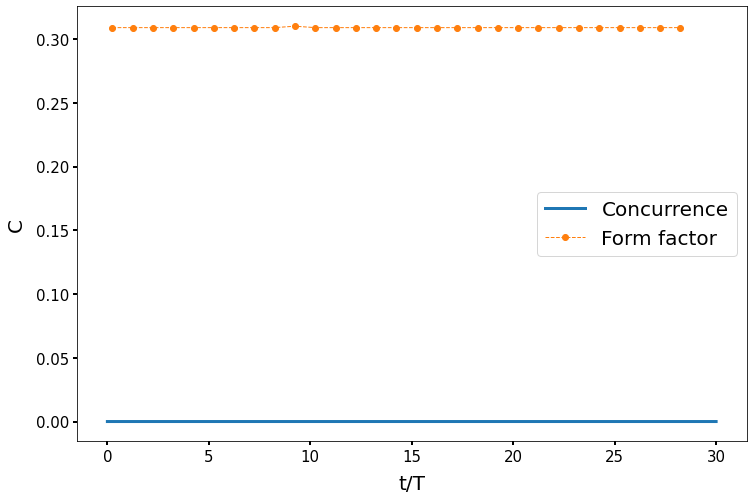

In [40]:
fig4 = plt.figure(3, figsize = [12, 8])
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(t_best/timescale_best, concurrence_best, lw = 3, label='Concurrence')
ax4.plot(t_best[indices_best[0:-1]]/timescale_best, FF_1_best, lw = 1, label='Form factor', linestyle='--', marker='o')

# ax4.plot(t_worst/timescale_worst, concurrence_worst, lw = 3, label='worst')
ax4.set_xlabel(r't/T', fontsize = 20, labelpad = 10)
ax4.set_ylabel(r'C', fontsize = 20, labelpad = 10)
ax4.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)
ax4.legend(fontsize=20)

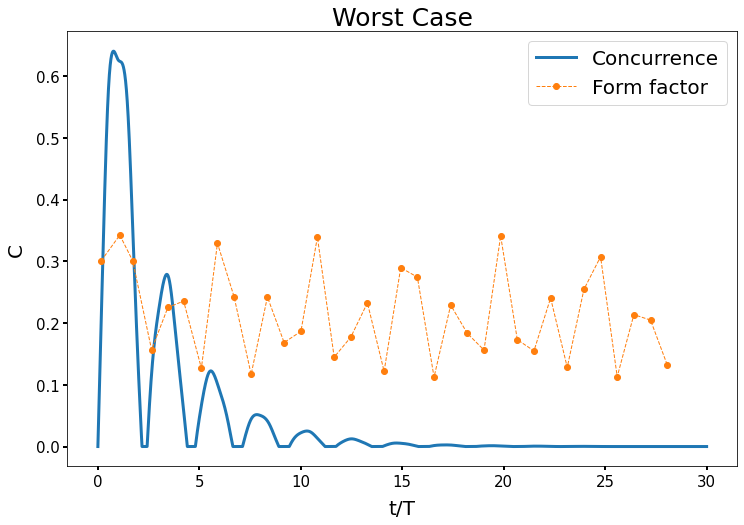

In [91]:
fig5 = plt.figure(5, figsize = [12, 8])
ax5 = fig5.add_subplot(1,1,1)
ax5.plot(t_worst/timescale_worst, concurrence_worst, lw = 3, label='Concurrence')
ax5.plot(t_worst[indices_worst[0:-1]]/timescale_worst, FF_1_worst, lw = 1, label='Form factor', linestyle='--', marker='o')

# ax4.plot(t_worst/timescale_worst, concurrence_worst, lw = 3, label='worst')
ax5.set_title('Worst Case', fontsize = 25)
ax5.set_xlabel(r't/T', fontsize = 20, labelpad = 10)
ax5.set_ylabel(r'C', fontsize = 20, labelpad = 10)
ax5.tick_params(axis='both', which='major', labelsize=15, width = 2, length=4)
ax5.legend(fontsize=20)

In [16]:
a = 0 

a is not 0


False